In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
docu_root = 'drive/My Drive/DS&ML/'

Mounted at /content/drive


# Yahoo股市蒐集資料

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download("^DJI",start='2013-01-01', end='2022-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,13104.299805,13412.709961,13104.299805,13412.549805,13412.549805,161430000
2013-01-03,13413.009766,13430.599609,13358.299805,13391.360352,13391.360352,129630000
2013-01-04,13391.049805,13447.110352,13376.230469,13435.209961,13435.209961,107590000
2013-01-07,13436.129883,13436.129883,13343.320312,13384.290039,13384.290039,113120000
2013-01-08,13377.419922,13377.419922,13293.129883,13328.849609,13328.849609,129570000
...,...,...,...,...,...,...
2022-12-23,32961.058594,33226.140625,32814.019531,33203.929688,33203.929688,221050000
2022-12-27,33224.230469,33387.718750,33069.578125,33241.558594,33241.558594,246010000
2022-12-28,33264.761719,33379.550781,32869.148438,32875.710938,32875.710938,252260000


In [ ]:
# df.to_csv(docu_root+"DJI.csv",index=False)

# 觀察資料
- tw2tw : 觀察台灣股價與台灣股價的關係
- tw2sp : 觀察台灣股價與S&P500的關係

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
TAIEX = pd.read_csv(docu_root + "TAIEX.csv")
SP500 = pd.read_csv(docu_root + "S&P500.csv")
DJI = pd.read_csv(docu_root + "DJI.csv")
NASDAQ = pd.read_csv(docu_root + "NASDAQ.csv")

In [ ]:
# 加入Label
# 1:漲(今日股價>昨日股價)
# 0:跌(今日股價<昨日股價)
TAIEX["label"] = (TAIEX["close"] > TAIEX["close"].shift()).astype(int)
TAIEX

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,MA5,MA20,MA60,MA240,target,1day,2day,3day,4day,5day,label
0,2013/1/2,TAIEX,3416421980,7.898632e+10,7738.05,7793.48,7715.26,7779.22,7779.220,7779.2200,7779.2200,7779.22000,7836.84,0.00,0.00,0.00,0.00,0.00,0
1,2013/1/3,TAIEX,4480963886,1.060000e+11,7826.34,7855.16,7815.29,7836.84,7836.840,7836.8400,7836.8400,7836.84000,7805.99,7779.22,0.00,0.00,0.00,0.00,1
2,2013/1/4,TAIEX,4172906828,1.000000e+11,7818.27,7818.27,7773.06,7805.99,7805.990,7805.9900,7805.9900,7805.99000,7755.09,7836.84,7779.22,0.00,0.00,0.00,0
3,2013/1/7,TAIEX,3868825706,8.850775e+10,7797.05,7797.05,7725.47,7755.09,7755.090,7755.0900,7755.0900,7755.09000,7721.66,7805.99,7836.84,7779.22,0.00,0.00,0
4,2013/1/8,TAIEX,3738832187,8.831702e+10,7737.07,7751.80,7692.98,7721.66,7779.760,7721.6600,7721.6600,7721.66000,7738.64,7755.09,7805.99,7836.84,7779.22,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022/12/26,TAIEX,3106471398,1.140000e+11,14271.20,14301.11,14253.20,14285.13,14280.826,14607.2905,13903.0795,15802.14238,14328.43,14271.63,14442.94,14234.40,14170.03,14433.32,1
2448,2022/12/27,TAIEX,3659061689,1.260000e+11,14310.19,14410.24,14310.19,14328.43,14312.506,14588.2300,13920.2120,15788.80204,14173.10,14285.13,14271.63,14442.94,14234.40,14170.03,1
2449,2022/12/28,TAIEX,4430499324,1.660000e+11,14249.83,14249.83,14119.30,14173.10,14300.246,14552.9075,13930.1550,15774.72773,14085.02,14328.43,14285.13,14271.63,14442.94,14234.40,0
2450,2022/12/29,TAIEX,4180927034,1.440000e+11,14097.51,14120.57,13981.63,14085.02,14228.662,14506.5185,13934.8815,15760.00042,14137.69,14173.10,14328.43,14285.13,14271.63,14442.94,0


In [ ]:
tw2tw = pd.DataFrame({
    "MA5": TAIEX["MA5"],
    "MA20": TAIEX["MA20"],
    "MA60": TAIEX["MA60"],
    "MA240": TAIEX["MA240"],
    "Target": TAIEX["target"],
    "Label": TAIEX["label"],
})

tw2sp = pd.DataFrame({
    "MA5": SP500["MA5"],
    "MA20": SP500["MA20"],
    "MA60": SP500["MA60"],
    "MA240": SP500["MA240"],
    "Target": TAIEX["target"]
})

tw2dji = pd.DataFrame({
    "MA5": DJI["MA5"],
    "MA20": DJI["MA20"],
    "MA60": DJI["MA60"],
    "MA240": DJI["MA240"],
    "Target": TAIEX["target"]
})

tw2nas = pd.DataFrame({
    "MA5": NASDAQ["MA5"],
    "MA20": NASDAQ["MA20"],
    "MA60": NASDAQ["MA60"],
    "MA240": NASDAQ["MA240"],
    "Target": TAIEX["target"]
})

In [ ]:
tw2tw["date"]=pd.to_datetime(TAIEX["date"].str.replace(" ", ""), format="%Y/%m/%d")

## 兩股市不同標的股價之間關係(X : 台灣股價、Y : 美國股價)

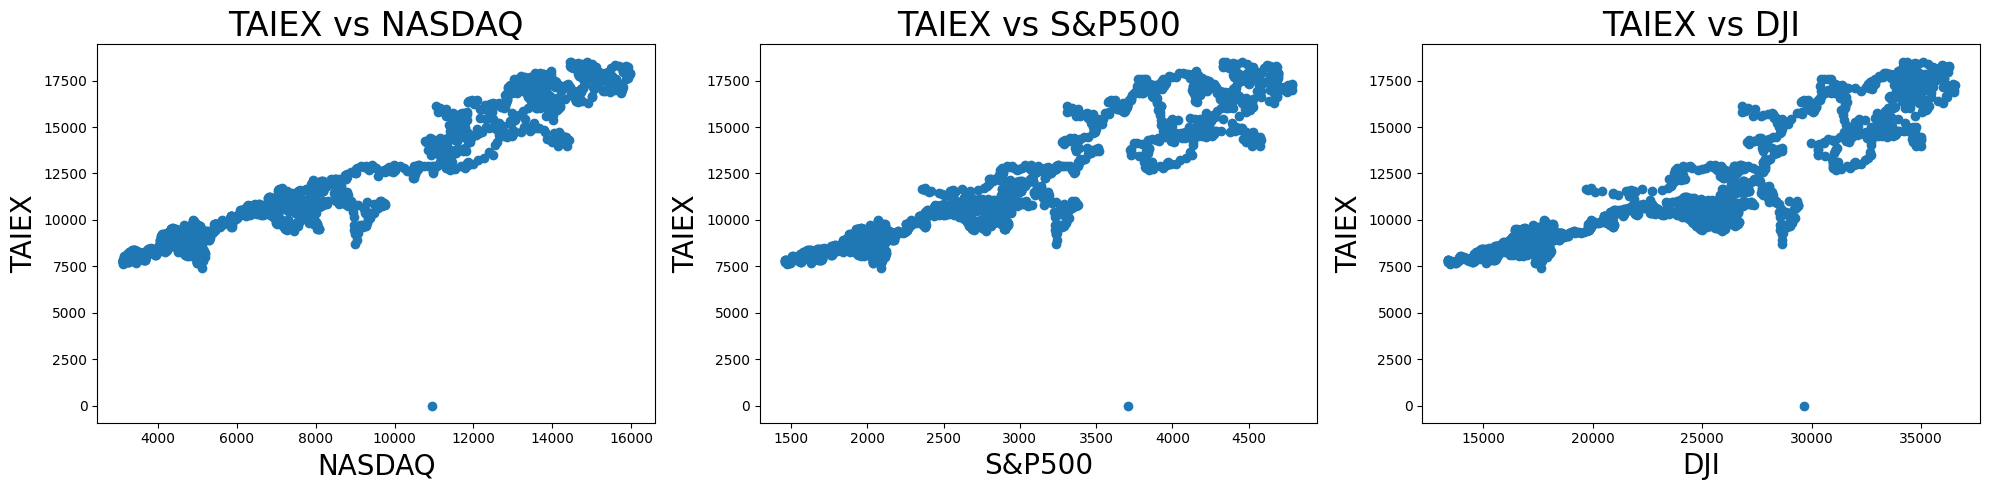

In [ ]:
# 設定子圖的排列方式
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# 分別繪製 close、MA7、MA30 與 Target 的散佈圖
axs[0].scatter(tw2nas["MA5"], tw2nas["Target"])
axs[0].set_xlabel("NASDAQ", fontsize = 20)
axs[0].set_ylabel("TAIEX", fontsize = 20)
axs[0].set_title("TAIEX vs NASDAQ", fontsize = 24)

axs[1].scatter(tw2sp["MA5"], tw2sp["Target"])
axs[1].set_xlabel("S&P500", fontsize = 20)
axs[1].set_ylabel("TAIEX", fontsize = 20)
axs[1].set_title("TAIEX vs S&P500", fontsize = 24)

axs[2].scatter(tw2dji["MA5"], tw2dji["Target"])
axs[2].set_xlabel("DJI", fontsize = 20)
axs[2].set_ylabel("TAIEX", fontsize = 20)
axs[2].set_title("TAIEX vs DJI", fontsize = 24)

plt.tight_layout()  # 調整子圖之間的間距
plt.show()

## Correlation


In [ ]:
correlation1 = tw2sp.corr()
correlation1 = correlation1["Target"].drop("Target")

correlation2 = tw2nas.corr()
correlation2 = correlation2["Target"].drop("Target")

correlation3 = tw2dji.corr()
correlation3 = correlation3["Target"].drop("Target")


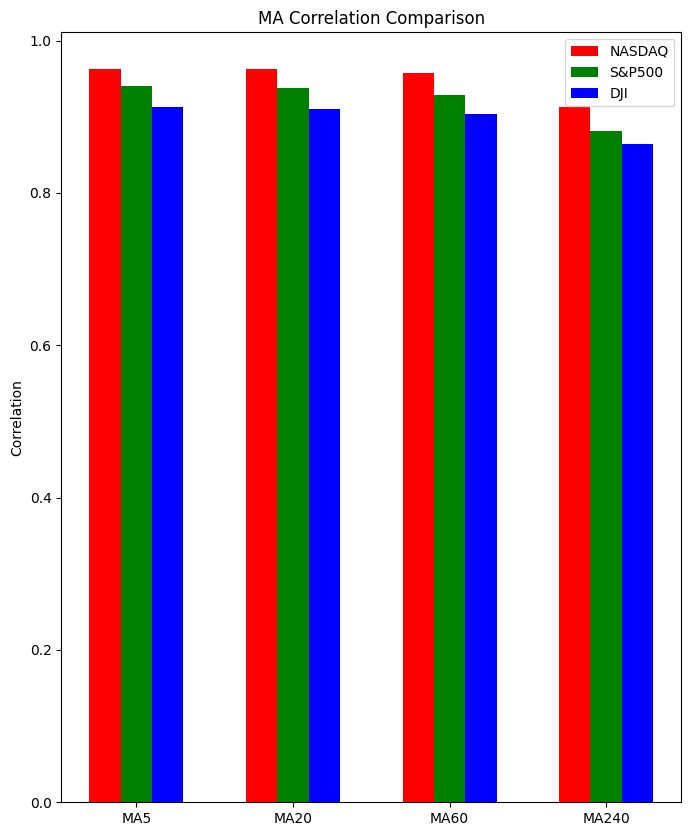

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 創建柱狀圖的數據
ma_labels = ['MA5', 'MA20', 'MA60', 'MA240']
tw2sp_ma = [correlation1['MA5'], correlation1['MA20'], correlation1['MA60'], correlation1['MA240']]
tw2nas_ma = [correlation2['MA5'], correlation2['MA20'], correlation2['MA60'], correlation2['MA240']]
tw2dji_ma = [correlation3['MA5'], correlation3['MA20'], correlation3['MA60'], correlation3['MA240']]

# 設置顏色
colors = ['red', 'green', 'blue', 'orange']

# 繪製柱狀圖
fig, ax = plt.subplots(figsize=(8, 10))
bar_width = 0.2
index = np.arange(len(ma_labels))

# 繪製NASDAQ的柱狀圖
ax.bar(index, tw2nas_ma, bar_width, color=colors[0], label='NASDAQ')

# 繪製S&P500的柱狀圖
ax.bar(index + bar_width, tw2sp_ma, bar_width, color=colors[1], label='S&P500')

# 繪製DJI的柱狀圖
ax.bar(index + 2 * bar_width, tw2dji_ma, bar_width, color=colors[2], label='DJI')

# 設置圖表標籤和圖例
ax.set_ylabel('Correlation')
ax.set_title('MA Correlation Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(ma_labels)
ax.legend(loc='upper right')

# 顯示圖表
plt.show()

# Loading Data

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from datetime import datetime

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# nltk.download('averaged_perceptron_tagger')

# model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [ ]:
# TAIEX + data label
# 0:跌爛, 1:漲爛
taiex = pd.read_csv(docu_root + "TAIEX.csv")
taiex["label"] = (taiex["close"] > taiex["close"].shift()).astype(int)
taiex['date'] = taiex['date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d') if x.strip() != '' else None)
taiex

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,MA5,MA20,MA60,MA240,target,1day,2day,3day,4day,5day,label
0,2013-01-02,TAIEX,3416421980,7.898632e+10,7738.05,7793.48,7715.26,7779.22,7779.220,7779.2200,7779.2200,7779.22000,7836.84,0.00,0.00,0.00,0.00,0.00,0
1,2013-01-03,TAIEX,4480963886,1.060000e+11,7826.34,7855.16,7815.29,7836.84,7836.840,7836.8400,7836.8400,7836.84000,7805.99,7779.22,0.00,0.00,0.00,0.00,1
2,2013-01-04,TAIEX,4172906828,1.000000e+11,7818.27,7818.27,7773.06,7805.99,7805.990,7805.9900,7805.9900,7805.99000,7755.09,7836.84,7779.22,0.00,0.00,0.00,0
3,2013-01-07,TAIEX,3868825706,8.850775e+10,7797.05,7797.05,7725.47,7755.09,7755.090,7755.0900,7755.0900,7755.09000,7721.66,7805.99,7836.84,7779.22,0.00,0.00,0
4,2013-01-08,TAIEX,3738832187,8.831702e+10,7737.07,7751.80,7692.98,7721.66,7779.760,7721.6600,7721.6600,7721.66000,7738.64,7755.09,7805.99,7836.84,7779.22,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022-12-26,TAIEX,3106471398,1.140000e+11,14271.20,14301.11,14253.20,14285.13,14280.826,14607.2905,13903.0795,15802.14238,14328.43,14271.63,14442.94,14234.40,14170.03,14433.32,1
2448,2022-12-27,TAIEX,3659061689,1.260000e+11,14310.19,14410.24,14310.19,14328.43,14312.506,14588.2300,13920.2120,15788.80204,14173.10,14285.13,14271.63,14442.94,14234.40,14170.03,1
2449,2022-12-28,TAIEX,4430499324,1.660000e+11,14249.83,14249.83,14119.30,14173.10,14300.246,14552.9075,13930.1550,15774.72773,14085.02,14328.43,14285.13,14271.63,14442.94,14234.40,0
2450,2022-12-29,TAIEX,4180927034,1.440000e+11,14097.51,14120.57,13981.63,14085.02,14228.662,14506.5185,13934.8815,15760.00042,14137.69,14173.10,14328.43,14285.13,14271.63,14442.94,0


In [ ]:
# TW_news
data_path = docu_root+'TW_News.csv'
news_raw_df = pd.read_csv(data_path)
news_raw_df['Date'] = pd.to_datetime(news_raw_df['Date']).dt.date
news_raw_df

,Unnamed: 0,Title,Date
0,0,基本工資時薪 今起漲為109元,2013-01-01
1,1,台灣主要報紙頭條要聞,2013-01-01
2,2,玫瑰花車大遊行 華航第22次獲獎,2013-01-02
3,3,去年10月勞保擠兌潮 領走436億,2013-01-02
4,4,經長：國營事業績效獎金將跟經濟指標掛勾下修,2013-01-02
...,...,...,...
35477,35477,財政部公布8便民新制 青安貸款再延2年、手機報稅新增2功能,2022-12-30
35478,35478,兔年『萬四』如意，暫時先避開『科技』類股！,2022-12-30
35479,35479,季線果然反彈!如何尋找2023年的強勢股?,2022-12-30
35480,35480,〈台股2022封關〉聯發科今年跌幅49% 市值蒸發9436億元,2022-12-30


# CKIP 斷詞處理

In [ ]:
# install dependencies
!pip install -U ckip-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00


In [ ]:
from ckip_transformers import __version__
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker


def init(GPU=False):
    # device=0 GPU, device=-1 CPU (default)
    if GPU:
        device = 0
    else:
        device = -1


    # Initialize drivers
    print("Initializing drivers ... WS")
    ws_driver = CkipWordSegmenter(model="bert-base", device=device)
    print("Initializing drivers ... POS")
    pos_driver = CkipPosTagger(model="bert-base", device=device)
    print("Initializing drivers ... NER")
    ner_driver = CkipNerChunker(model="bert-base", device=device)
    print("Initializing drivers ... done")
    print()

    return ws_driver, pos_driver, ner_driver

ws_driver, pos_driver,ner_driver = init(GPU=True)

Initializing drivers ... WS


Initializing drivers ... POS


Initializing drivers ... NER


Initializing drivers ... done



In [ ]:
#要跑斷詞就跑這個
news_list = news_raw_df['Title'].tolist()
news_list = [str(item) for item in news_list]

In [ ]:
batch_size = 256
max_length = 128
print("Running pipeline ... WS")
ws = ws_driver(news_list, batch_size=batch_size, max_length=max_length)
print("Running pipeline ... POS")
pos = pos_driver(ws, batch_size=batch_size, max_length=max_length)
# print("Running pipeline ... NER")
# ner = ner_driver(text, batch_size=batch_size, max_length=max_length)
print("Running pipeline ... done")
print()

Running pipeline ... WS


Inference: 100%|██████████| 139/139 [00:45<00:00,  3.03it/s]


Running pipeline ... POS


Inference: 100%|██████████| 166/166 [00:45<00:00,  3.64it/s]


Running pipeline ... done



In [ ]:
#儲存斷詞後的結果
#跑過斷詞就用這個儲存

ws_store=np.array(ws)
np.save(docu_root+'ws_store_transformer.npy',ws_store)

pos_store=np.array(pos)
np.save(docu_root+'pos_store_transformer.npy',pos_store)

<ipython-input-8-6bcc444f7f69>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ws_store=np.array(ws)
<ipython-input-8-6bcc444f7f69>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pos_store=np.array(pos)


In [ ]:
# 可以用這個直接讀取已經儲存的斷詞
# 沒跑上面斷詞就直接用這個
ws = np.load(docu_root+'ws_store_transformer.npy', allow_pickle=True)
ws = ws.tolist()

pos = np.load(docu_root+'pos_store_transformer.npy' , allow_pickle=True)
pos = pos.tolist()

In [ ]:
# 把斷詞加入news_raw_df
news_raw_df['Tokenlist'] = ws
news_raw_df

,Unnamed: 0,Title,Date,Tokenlist
0,0,基本工資時薪 今起漲為109元,2013-01-01,"[基本, 工資, 時薪, , 今, 起, 漲為, 109, 元]"
1,1,台灣主要報紙頭條要聞,2013-01-01,"[台灣, 主要, 報紙, 頭條, 要聞]"
2,2,玫瑰花車大遊行 華航第22次獲獎,2013-01-02,"[玫瑰, 花車, 大, 遊行, , 華航, 第22, 次, 獲獎]"
3,3,去年10月勞保擠兌潮 領走436億,2013-01-02,"[去年, 10月, 勞保, 擠兌潮, , 領走, 436億]"
4,4,經長：國營事業績效獎金將跟經濟指標掛勾下修,2013-01-02,"[經長, ：, 國營, 事業, 績效, 獎金, 將, 跟, 經濟, 指標, 掛勾, 下修]"
...,...,...,...,...
35477,35477,財政部公布8便民新制 青安貸款再延2年、手機報稅新增2功能,2022-12-30,"[財政部, 公布, 8, 便民, 新制, , 青安, 貸款, 再, 延, 2, 年, 、,..."
35478,35478,兔年『萬四』如意，暫時先避開『科技』類股！,2022-12-30,"[兔年, 『, 萬四, 』, 如意, ，, 暫時, 先, 避開, 『, 科技, 』, 類股, ！]"
35479,35479,季線果然反彈!如何尋找2023年的強勢股?,2022-12-30,"[季線, 果然, 反彈, !, 如何, 尋找, 2023年, 的, 強勢股, ?]"
35480,35480,〈台股2022封關〉聯發科今年跌幅49% 市值蒸發9436億元,2022-12-30,"[〈, 台股, 2022, 封關, 〉, 聯發科, 今年, 跌幅, 49%, , 市值, ..."


# Merge Dataframe

In [ ]:
news_df = news_raw_df[["Tokenlist", "Date"]]

# 根據"Date"進行分群，並將"Tokenlist"合併成一維list
news_df = news_df.explode("Tokenlist")
news_df = news_df.groupby("Date")["Tokenlist"].agg(list).reset_index()
news_df["Tokenlist"] = news_df["Tokenlist"].tolist()

news_df

,Date,Tokenlist
0,2013-01-01,"[基本, 工資, 時薪, , 今, 起, 漲為, 109, 元, 台灣, 主要, 報紙, ..."
1,2013-01-02,"[玫瑰, 花車, 大, 遊行, , 華航, 第22, 次, 獲獎, 去年, 10月, 勞保..."
2,2013-01-03,"[海華, 前進, CES , 推出, 3, 大, 無線, 新, 技術, 及, 微投影機, 台..."
3,2013-01-04,"[〈, 期指, 〉, 免, 驚, ！, 台指期, 量能, 放大, , 三, 大, 法人, ..."
4,2013-01-05,"[台股, 開年, 紅盤, 周報喜, , 投信, ：, 價量, 配合, , 可望, 挑戰..."
...,...,...
3643,2022-12-26,"[考量, 全球, 經濟, 不, 穩定, , 新金寶, 集團, 擬, 逐步, 退出, 半導體..."
3644,2022-12-27,"[趁, 11月, 股市, 強彈, , 金融, 三, 業, 落袋為安, 近, 千億, 元, ..."
3645,2022-12-28,"[【, 台指, 操作, 攻略, 】, 開低走低, 摜, 破, 生死線, , , 半路, ..."
3646,2022-12-29,"[與, 基亞, 陷, 內線, 交易, 疑雲, , 高端, ：, 對, 財務, 無, 影響,..."


In [ ]:
# remove 非中文、英文和數字的詞
def filter_token(token):
    pattern = re.compile(r'[^\u4e00-\u9fa5a-zA-Z0-9]')
    filtered_token = pattern.sub('', token)
    return filtered_token

news_df['Tokenlist'] = news_df['Tokenlist'].apply(lambda x: [filter_token(token) for token in x])

In [ ]:
## merge dataframe
news_df['Date'] = pd.to_datetime(news_df['Date'])
taiex['date'] = pd.to_datetime(taiex['date'])

merged_df = pd.merge(news_df, taiex, left_on='Date', right_on='date', how='inner')
merged_df = merged_df[["Date", "Tokenlist", "close", "MA5", "label", '1day', '2day', '3day', '4day', '5day']]

# 將各斷詞以空格合併，後續word embedding比較方便處理輸入資料
def space(token_list):
    return ' '.join(token_list)

merged_df['Tokenlist'] = merged_df['Tokenlist'].apply(space)
merged_df

,Date,Tokenlist,close,MA5,label,1day,2day,3day,4day,5day
0,2013-01-02,玫瑰 花車 大 遊行 華航 第22 次 獲獎 去年 10月 勞保 擠兌潮 領走 436億...,7779.22,7779.220,0,0.00,0.00,0.00,0.00,0.00
1,2013-01-03,海華 前進 CES 推出 3 大 無線 新 技術 及 微投影機 台幣 匯率 面臨 29 元 ...,7836.84,7836.840,1,7779.22,0.00,0.00,0.00,0.00
2,2013-01-04,期指 免 驚 台指期 量能 放大 三 大 法人 期貨 仍 加碼 多 單 HTC 周永...,7805.99,7805.990,0,7836.84,7779.22,0.00,0.00,0.00
3,2013-01-07,友華 集團 新 藥 開發 就 定位 鎖定 中樞 神經 藥物 700億 美元 商機 碩禾 上...,7755.09,7755.090,0,7805.99,7836.84,7779.22,0.00,0.00
4,2013-01-08,王品 戴勝益 台灣 年輕人 仍 充滿 機會 拿 100 K 不 難 旭隼 登 興櫃 首日...,7721.66,7779.760,0,7755.09,7805.99,7836.84,7779.22,0.00
...,...,...,...,...,...,...,...,...,...,...
2446,2022-12-26,考量 全球 經濟 不 穩定 新金寶 集團 擬 逐步 退出 半導體 投資 事業 明年 首 批...,14285.13,14280.826,1,14271.63,14442.94,14234.40,14170.03,14433.32
2447,2022-12-27,趁 11月 股市 強彈 金融 三 業 落袋為安 近 千億 元 壽險 大 砍 台股 逾 6...,14328.43,14312.506,1,14285.13,14271.63,14442.94,14234.40,14170.03
2448,2022-12-28,台指 操作 攻略 開低走低 摜 破 生死線 半路 上車 該不該 逃命 世紀鋼 Jac...,14173.10,14300.246,0,14328.43,14285.13,14271.63,14442.94,14234.40
2449,2022-12-29,與 基亞 陷 內線 交易 疑雲 高端 對 財務 無 影響 樺漢 旗下 Kontron 完...,14085.02,14228.662,0,14173.10,14328.43,14285.13,14271.63,14442.94


# Text Embedding

## Doc2Vec

In [ ]:
corpus = merged_df['Tokenlist'].tolist()

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tag_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(corpus)]
model = Doc2Vec(vector_size=300, min_count=5, workers=8, epochs=40)
model.build_vocab(tag_docs)
model.train(tag_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
news_title_d2v = np.array([model.infer_vector((doc.split(' '))) for doc in corpus])

In [ ]:
merged_df = pd.concat([merged_df, pd.DataFrame(news_title_d2v)],axis=1)
# merged_df

## BERT

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertModel, BertTokenizer
import torch


def bert_word_embedding(df):

  # 加載BERT模型和tokenizer
  model_name = 'bert-base-chinese'

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  tokenizer = BertTokenizer.from_pretrained(model_name)
  model = BertModel.from_pretrained(model_name).to(device)

  sentences = df["Tokenlist"].tolist()

  # 創建一個空的列表，用於存儲word embeddings
  embeddings = []

  for sentence in sentences:
      # 對句子進行tokenization
      tokens = tokenizer.tokenize(sentence)
      # 添加特殊標記 [CLS] 在句首和 [SEP] 在句尾
      tokens = ['[CLS]'] + tokens + ['[SEP]']

      # 將token轉換為索引
      indexed_tokens = tokenizer.convert_tokens_to_ids(tokens)

      # 將索引轉換為PyTorch的tensor
      tokens_tensor = torch.tensor([indexed_tokens]).to(device)

      # 使用BERT模型對文本進行向量化
      with torch.no_grad():
          outputs = model(tokens_tensor)

      # 獲取句子的向量表示
      sentence_embedding = outputs[0].squeeze(0).mean(dim=0)

      # 將句子的向量表示添加到embeddings列表中
      embeddings.append(sentence_embedding)

  embeddings_tensor = torch.stack(embeddings)

  return embeddings_tensor

In [ ]:
corpus = merged_df['Tokenlist'].tolist()

bert_df = merged_df["Tokenlist"]
bert_df = pd.DataFrame(bert_df)

In [ ]:
embeddings_tensor = bert_word_embedding(bert_df)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_df = pd.DataFrame(embeddings_tensor.cpu().numpy())

In [ ]:
merged_df = pd.concat([merged_df, bert_df],axis=1)

In [ ]:
merged_df

,Date,Tokenlist,close,MA5,label,1day,2day,3day,4day,5day,...,758,759,760,761,762,763,764,765,766,767
0,2013-01-02,玫瑰 花車 大 遊行 華航 第22 次 獲獎 去年 10月 勞保 擠兌潮 領走 436億...,7779.22,7779.220,0,0.00,0.00,0.00,0.00,0.00,...,0.497977,0.072571,0.002272,-0.129005,-0.155288,-0.305672,-0.539162,0.322405,-0.185427,0.006846
1,2013-01-03,海華 前進 CES 推出 3 大 無線 新 技術 及 微投影機 台幣 匯率 面臨 29 元 ...,7836.84,7836.840,1,7779.22,0.00,0.00,0.00,0.00,...,0.233072,-0.022775,-0.017125,-0.028409,-0.108433,-0.202055,-0.383948,0.250459,-0.349674,0.136467
2,2013-01-04,期指 免 驚 台指期 量能 放大 三 大 法人 期貨 仍 加碼 多 單 HTC 周永...,7805.99,7805.990,0,7836.84,7779.22,0.00,0.00,0.00,...,0.186916,0.260357,0.153355,-0.093210,-0.220267,-0.339893,-0.477262,0.355474,-0.223885,0.124316
3,2013-01-07,友華 集團 新 藥 開發 就 定位 鎖定 中樞 神經 藥物 700億 美元 商機 碩禾 上...,7755.09,7755.090,0,7805.99,7836.84,7779.22,0.00,0.00,...,0.558059,-0.104553,-0.026401,0.046986,-0.259538,-0.208724,-0.434517,0.433375,-0.313726,0.007405
4,2013-01-08,王品 戴勝益 台灣 年輕人 仍 充滿 機會 拿 100 K 不 難 旭隼 登 興櫃 首日...,7721.66,7779.760,0,7755.09,7805.99,7836.84,7779.22,0.00,...,0.325907,0.135944,-0.167385,0.045934,-0.205278,0.004697,-0.712617,0.383336,-0.493536,0.107856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,2022-12-26,考量 全球 經濟 不 穩定 新金寶 集團 擬 逐步 退出 半導體 投資 事業 明年 首 批...,14285.13,14280.826,1,14271.63,14442.94,14234.40,14170.03,14433.32,...,0.372596,0.126351,0.102271,0.029685,-0.169957,-0.160581,-0.426029,0.302336,-0.324481,0.048130
2447,2022-12-27,趁 11月 股市 強彈 金融 三 業 落袋為安 近 千億 元 壽險 大 砍 台股 逾 6...,14328.43,14312.506,1,14285.13,14271.63,14442.94,14234.40,14170.03,...,0.409749,0.097143,-0.096712,0.068893,-0.068169,-0.204254,-0.386390,0.202364,-0.448884,-0.008265
2448,2022-12-28,台指 操作 攻略 開低走低 摜 破 生死線 半路 上車 該不該 逃命 世紀鋼 Jac...,14173.10,14300.246,0,14328.43,14285.13,14271.63,14442.94,14234.40,...,0.374814,0.072371,-0.064131,0.014118,-0.155577,-0.095523,-0.484324,0.409024,-0.316403,0.083479
2449,2022-12-29,與 基亞 陷 內線 交易 疑雲 高端 對 財務 無 影響 樺漢 旗下 Kontron 完...,14085.02,14228.662,0,14173.10,14328.43,14285.13,14271.63,14442.94,...,0.368412,0.070388,0.179017,0.161697,-0.213763,-0.135625,-0.384365,0.305402,-0.400477,-0.023266


# 實驗一
- 用台灣新聞+股價預測台灣股價

## 切割資料

In [ ]:
# 用exp1_df 在實驗一
# 想說不要動到 merged_df，不然兩個實驗會衝突到
exp1_df = merged_df

# 把merged_df都換成exp1_df
exp1_df['Date'] = pd.to_datetime(exp1_df['Date'])
# 提取年份資訊
exp1_df['Year'] = exp1_df['Date'].dt.year

# 切割訓練集
X_train = exp1_df[exp1_df['Year'] < 2022]
y_train = exp1_df[exp1_df['Year'] < 2022]['label']

# 切割測試集
X_test = exp1_df[exp1_df['Year'] == 2022]
y_test = exp1_df[exp1_df['Year'] == 2022]['label']

In [ ]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
# Get X_train_news
X_train_news = X_train.drop(['Date', 'Tokenlist', 'close', 'MA5', 'label', 'Year', '1day', '2day', '3day', '4day', '5day'], axis=1)
X_test_news = X_test.drop(['Date', 'Tokenlist', 'close', 'MA5', 'label', 'Year', '1day', '2day', '3day', '4day', '5day'], axis=1)

# Get y_train_news
selected_columns = ['1day', '2day', '3day', '4day', '5day']
X_train_price = X_train[selected_columns]
X_test_price = X_test[selected_columns]

In [ ]:
print('訓練集訓練量：{}'.format(len(X_train_news)))
print('測試集訓練量：{}'.format(len(X_test_news)))

訓練集訓練量：2205
測試集訓練量：246


In [ ]:
## test
tokenlists = corpus

# 合併所有的Tokenlist
all_tokens = [token for tokenlist in tokenlists for token in tokenlist]

# 使用set去重複的詞
unique_tokens = set(all_tokens)

# 計算數量
vocab_size = len(unique_tokens)

print("Vocabulary size:", vocab_size)

Vocabulary size: 3220


## Model
- 這是台灣股價+台灣新聞預測股價

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Input, Concatenate

In [ ]:
X_train_news = np.expand_dims(X_train_news, axis=-1)
X_test_news = np.expand_dims(X_test_news, axis=-1)

X_train_price = np.expand_dims(X_train_price, axis=-1)
X_test_price = np.expand_dims(X_test_price, axis=-1)

In [ ]:
X_train_news.shape

(2205, 768, 1)

In [ ]:
X_train_price.shape

(2205, 5, 1)

In [ ]:
# reference:https://stackoverflow.com/questions/53380560/combining-two-cnns
from keras.layers import Input, Concatenate, LeakyReLU
from keras.models import Model
from keras.layers import Dense, LSTM, Embedding, Dropout

# 建立第一個模型
input_dim = vocab_size
embedding_dim = 300

input_news = Input(shape=(X_train_news.shape[1],))
embedding_news = Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=X_train_news.shape[1])(input_news)
lstm_news = LSTM(units=10, return_sequences=True)(embedding_news)
lstm_news = LSTM(units=10, return_sequences=False)(lstm_news)

# 建立第二個模型
input_price = Input(shape=(X_train_price.shape[1],))
dense_price = Dense(64)(input_price)
leakyrelu_price = LeakyReLU()(dense_price)
dropout_price = Dropout(0.1)(leakyrelu_price)
dense2_price = Dense(10)(dropout_price)
leakyrelu2_price = LeakyReLU()(dense2_price)

# 合併兩個模型
concatenated = Concatenate()([lstm_news, leakyrelu2_price])

# 建立最終模型
output = Dense(2)(concatenated)
leakyrelu_output = LeakyReLU()(output)
output = Dense(1, activation='sigmoid')(leakyrelu_output)

final = Model(inputs=[input_news, input_price], outputs=output)
final.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           384         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 64)           0           ['dense[0][0]']                  
                                                                                              

In [ ]:
from keras.optimizers import Adam, Adagrad

optimizer = Adam(learning_rate=0.0001)
# final.compile(loss=custom_loss_with_penalty, optimizer=optimizer, metrics=["accuracy"])
final.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = final.fit([X_train_news, X_train_price], y_train, epochs=700, validation_data=([X_test_news, X_test_price], y_test))


Epoch 1/700
69/69 [==============================] - 9s 53ms/step - loss: 198.0951 - accuracy: 0.5075 - val_loss: 41.0329 - val_accuracy: 0.5244
Epoch 2/700
69/69 [==============================] - 3s 40ms/step - loss: 51.7463 - accuracy: 0.4902 - val_loss: 17.1951 - val_accuracy: 0.5244
Epoch 3/700
69/69 [==============================] - 3s 49ms/step - loss: 41.3772 - accuracy: 0.5116 - val_loss: 6.2518 - val_accuracy: 0.5244
Epoch 4/700
69/69 [==============================] - 4s 55ms/step - loss: 35.3099 - accuracy: 0.4993 - val_loss: 4.7762 - val_accuracy: 0.4756
Epoch 5/700
69/69 [==============================] - 3s 40ms/step - loss: 35.9151 - accuracy: 0.4989 - val_loss: 7.0774 - val_accuracy: 0.5244
Epoch 6/700
69/69 [==============================] - 3s 40ms/step - loss: 30.6635 - accuracy: 0.5025 - val_loss: 1.1570 - val_accuracy: 0.5407
Epoch 7/700
69/69 [==============================] - 3s 40ms/step - loss: 28.7443 - accuracy: 0.5179 - val_loss: 2.3325 - val_accuracy: 0.5

In [ ]:
# 這邊是因為可以訓練300次，然後劃出圖，再加上400次
# 如果要加上去不要執行這行
# 如果要重新訓練要去初始化model
total_history = {}

In [ ]:
for key in history.history.keys():
  if key in total_history.keys():
    total_history[key] = total_history[key] + history.history[key]
  else:
    total_history[key] = history.history[key]

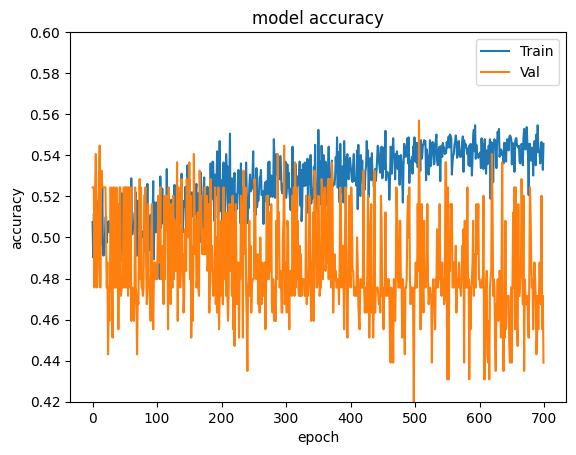

In [ ]:
# 畫圖

plt.plot(total_history["accuracy"], label="Train")
plt.plot(total_history["val_accuracy"], label="Val")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()

# 把y軸尺度拉大圖比較好看
plt.ylim(0.42, 0.6)

plt.show()

# 實驗二
- 把NASDAQ股價加入TAIEX

In [ ]:
# 取得NASDAQ資料
nas = pd.read_csv(docu_root + "NASDAQ.csv")
nas['Date'] = nas['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d') if x.strip() != '' else None)

In [ ]:
# exp2_df用在實驗二
exp2_df = merged_df

exp2_df['Date'] = pd.to_datetime(exp2_df['Date'])
# 提取年份資訊
exp2_df['Year'] = exp2_df['Date'].dt.year

renamed_cols = {
    '1day': 'taiex_1day',
    '2day': 'taiex_2day',
    '3day': 'taiex_3day',
    '4day': 'taiex_4day',
    '5day': 'taiex_5day'
}

exp2_df = exp2_df.rename(columns=renamed_cols)

In [ ]:
exp2_df = exp2_df.merge(nas[['Date', '1day', '2day', '3day', '4day', '5day']], on='Date', how='inner')

renamed_cols = {
    '1day': 'nas_1day',
    '2day': 'nas_2day',
    '3day': 'nas_3day',
    '4day': 'nas_4day',
    '5day': 'nas_5day'
}

exp2_df = exp2_df.rename(columns=renamed_cols)

In [ ]:
# 切割訓練集
X_train = exp2_df[exp2_df['Year'] < 2022]
y_train = exp2_df[exp2_df['Year'] < 2022]['label']

# 切割測試集
X_test = exp2_df[exp2_df['Year'] == 2022]
y_test = exp2_df[exp2_df['Year'] == 2022]['label']

In [ ]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
# Get X_train_news
X_train_news = X_train.drop(['Date', 'Tokenlist', 'close', 'MA5', 'label', 'Year', 'taiex_1day', 'taiex_2day', 'taiex_3day', 'taiex_4day', 'taiex_5day', 'nas_1day', 'nas_2day', 'nas_3day', 'nas_4day', 'nas_5day'], axis=1)
X_test_news = X_test.drop(['Date', 'Tokenlist', 'close', 'MA5', 'label', 'Year', 'taiex_1day', 'taiex_2day', 'taiex_3day', 'taiex_4day', 'taiex_5day', 'nas_1day', 'nas_2day', 'nas_3day', 'nas_4day', 'nas_5day'], axis=1)

# Get y_train_news
selected_columns = ['taiex_1day', 'taiex_2day', 'taiex_3day', 'taiex_4day', 'taiex_5day', 'nas_1day', 'nas_2day', 'nas_3day', 'nas_4day', 'nas_5day']
X_train_price = X_train[selected_columns]
X_test_price = X_test[selected_columns]

In [ ]:
print('訓練集訓練量：{}'.format(len(X_train_news)))
print('測試集訓練量：{}'.format(len(X_test_news)))

訓練集訓練量：2127
測試集訓練量：237


In [ ]:
## test
tokenlists = corpus

# 合併所有的Tokenlist
all_tokens = [token for tokenlist in tokenlists for token in tokenlist]

# 使用set去重複的詞
unique_tokens = set(all_tokens)

# 計算數量
vocab_size = len(unique_tokens)

print("Vocabulary size:", vocab_size)

Vocabulary size: 3220


## Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Input, Concatenate

In [ ]:
X_train_news = np.expand_dims(X_train_news, axis=-1)
X_test_news = np.expand_dims(X_test_news, axis=-1)

X_train_price = np.expand_dims(X_train_price, axis=-1)
X_test_price = np.expand_dims(X_test_price, axis=-1)

In [ ]:
# reference:https://stackoverflow.com/questions/53380560/combining-two-cnns
from keras.layers import Input, Concatenate, LeakyReLU
from keras.models import Model
from keras.layers import Dense, LSTM, Embedding, Dropout

# 建立第一個模型(台股新聞)
input_dim = vocab_size
embedding_dim = 300

input_news = Input(shape=(X_train_news.shape[1],))
embedding_news = Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=X_train_news.shape[1])(input_news)
lstm_news = LSTM(units=10, return_sequences=True)(embedding_news)
lstm_news = LSTM(units=10, return_sequences=False)(lstm_news)

# 建立第二個模型()
input_price = Input(shape=(X_train_price.shape[1],))
dense_price = Dense(64)(input_price)
leakyrelu_price = LeakyReLU()(dense_price)
dropout_price = Dropout(0.1)(leakyrelu_price)
dense2_price = Dense(10)(dropout_price)
leakyrelu2_price = LeakyReLU()(dense2_price)

# 合併兩個模型
concatenated = Concatenate()([lstm_news, leakyrelu2_price])

# 建立最終模型
output = Dense(2)(concatenated)
leakyrelu_output = LeakyReLU()(output)
output = Dense(1, activation='sigmoid')(leakyrelu_output)

final = Model(inputs=[input_news, input_price], outputs=output)
final.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           704         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 64)           0           ['dense[0][0]']                  
                                                                                              

In [ ]:
from keras.optimizers import Adam, Adagrad

optimizer = Adam(learning_rate=0.0001)
final.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = final.fit([X_train_news, X_train_price], y_train, epochs=700, validation_data=([X_test_news, X_test_price], y_test))


Epoch 1/700
67/67 [==============================] - 11s 57ms/step - loss: 1151.1031 - accuracy: 0.4589 - val_loss: 970.6582 - val_accuracy: 0.5232
Epoch 2/700
67/67 [==============================] - 3s 48ms/step - loss: 504.2676 - accuracy: 0.4951 - val_loss: 143.1884 - val_accuracy: 0.5232
Epoch 3/700
67/67 [==============================] - 4s 62ms/step - loss: 409.4215 - accuracy: 0.4908 - val_loss: 220.4709 - val_accuracy: 0.5232
Epoch 4/700
67/67 [==============================] - 3s 42ms/step - loss: 356.0636 - accuracy: 0.4937 - val_loss: 225.6048 - val_accuracy: 0.5232
Epoch 5/700
67/67 [==============================] - 3s 41ms/step - loss: 319.5034 - accuracy: 0.4955 - val_loss: 190.3063 - val_accuracy: 0.5232
Epoch 6/700
67/67 [==============================] - 3s 41ms/step - loss: 266.1951 - accuracy: 0.4814 - val_loss: 84.2544 - val_accuracy: 0.5232
Epoch 7/700
67/67 [==============================] - 3s 50ms/step - loss: 245.5361 - accuracy: 0.4795 - val_loss: 40.4244 -

In [ ]:
# 這邊是因為可以訓練300次，然後劃出圖，再加上400次
# 如果要加上去不要執行這行
# 如果要重新訓練要去初始化model
total_history = {}

In [ ]:
for key in history.history.keys():
  if key in total_history.keys():
    total_history[key] = total_history[key] + history.history[key]
  else:
    total_history[key] = history.history[key]

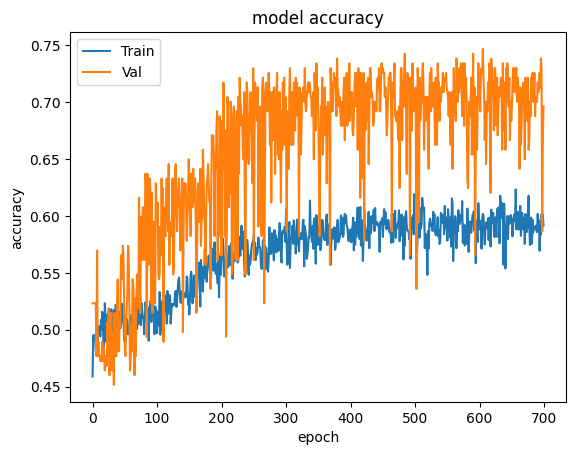

In [ ]:
# 畫圖

plt.plot(total_history["accuracy"], label="Train")
plt.plot(total_history["val_accuracy"], label="Val")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()

# 把y軸尺度拉大圖比較好看
# plt.ylim(0.46, 0.62)

plt.show()

# 實驗三
- Ref:https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2

In [ ]:
# 取得NASDAQ資料
nas = pd.read_csv(docu_root + "NASDAQ.csv")
nas['Date'] = nas['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d') if x.strip() != '' else None)

In [ ]:
taiex.rename(columns={'date': 'Date'}, inplace=True)
granger_df = pd.merge(taiex[['Date', 'close']], nas[['Date', 'Adj Close']], left_on='Date', right_on='Date', how='inner').rename(columns = {'close':'TAIEX', 'Adj Close':'NASDAQ'})

granger_df

,Date,TAIEX,NASDAQ
0,2013-01-02,7779.22,3112.260010
1,2013-01-03,7836.84,3100.570068
2,2013-01-04,7805.99,3101.659912
3,2013-01-07,7755.09,3098.810059
4,2013-01-08,7721.66,3091.810059
...,...,...,...
2359,2022-12-23,14271.63,10497.860350
2360,2022-12-27,14328.43,10353.230470
2361,2022-12-28,14173.10,10213.290040
2362,2022-12-29,14085.02,10478.089840


## ADF檢定

In [ ]:
n_obs = 20
granger_df_train, granger_df_test = granger_df[0:-n_obs], granger_df[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('ADF Test: TAIEX time series')
adf_test(granger_df_train['TAIEX'])
print('ADF Test: NASDAQ time series')
adf_test(granger_df_train['NASDAQ'])

ADF Test: TAIEX time series
ADF Statistics: -0.923783
p-value: 0.780039
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: NASDAQ time series
ADF Statistics: -0.919357
p-value: 0.781531
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


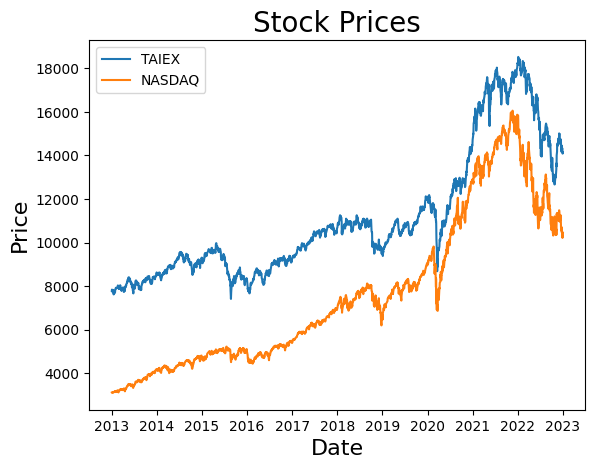

In [ ]:
import matplotlib.pyplot as plt

plt.plot(granger_df['Date'], granger_df['TAIEX'], label='TAIEX')
plt.plot(granger_df['Date'], granger_df['NASDAQ'], label='NASDAQ')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Stock Prices', fontsize=20)
plt.legend()

plt.show()


## Difference Method

In [ ]:
granger_df_train_transformed = granger_df_train[['TAIEX', 'NASDAQ']].diff().dropna()
granger_df_train_transformed['Date'] = granger_df_train['Date']

granger_df_train_transformed = granger_df_train_transformed.set_index('Date').rename_axis('market', axis=1)
granger_df_train_transformed

market,TAIEX,NASDAQ
Date,,
2013-01-03,57.62,-11.689942
2013-01-04,-30.85,1.089844
2013-01-07,-50.90,-2.849853
2013-01-08,-33.43,-7.000000
2013-01-09,16.98,14.000000
...,...,...
2022-11-25,169.97,-58.959960
2022-11-28,-221.64,-176.860350
2022-11-29,152.77,-65.719730


In [ ]:
import plotly.express as px

fig = px.line(granger_df_train_transformed, facet_col="market",  facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
# 再次執行ADF檢定
print('ADF Test: TAIEX time series')
adf_test(granger_df_train_transformed['TAIEX'])
print('ADF Test: NASDAQ time series')
adf_test(granger_df_train_transformed['NASDAQ'])

ADF Test: TAIEX time series
ADF Statistics: -17.004389
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Test: NASDAQ time series
ADF Statistics: -16.134453
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


## Granger因果關係檢定

In [ ]:
granger_df_train_transformed

market,TAIEX,NASDAQ
Date,,
2013-01-03,57.62,-11.689942
2013-01-04,-30.85,1.089844
2013-01-07,-50.90,-2.849853
2013-01-08,-33.43,-7.000000
2013-01-09,16.98,14.000000
...,...,...
2022-11-25,169.97,-58.959960
2022-11-28,-221.64,-176.860350
2022-11-29,152.77,-65.719730


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=5
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(granger_df_train_transformed, variables = granger_df_train_transformed.columns)

,TAIEX_x,NASDAQ_x
TAIEX_y,1.0000,0.0
NASDAQ_y,0.0726,1.0


In [ ]:
grangercausalitytests(granger_df_train_transformed[["NASDAQ", "TAIEX"]], maxlag=maxlag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0260  , p=0.8719  , df_denom=2339, df_num=1
ssr based chi2 test:   chi2=0.0260  , p=0.8719  , df=1
likelihood ratio test: chi2=0.0260  , p=0.8719  , df=1
parameter F test:         F=0.0260  , p=0.8719  , df_denom=2339, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4194  , p=0.0892  , df_denom=2336, df_num=2
ssr based chi2 test:   chi2=4.8491  , p=0.0885  , df=2
likelihood ratio test: chi2=4.8441  , p=0.0887  , df=2
parameter F test:         F=2.4194  , p=0.0892  , df_denom=2336, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3193  , p=0.0735  , df_denom=2333, df_num=3
ssr based chi2 test:   chi2=6.9789  , p=0.0726  , df=3
likelihood ratio test: chi2=6.9685  , p=0.0729  , df=3
parameter F test:         F=2.3193  , p=0.0735  , df_denom=2333, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0825  , p=0.

{1: ({'ssr_ftest': (0.02598586080626343, 0.871948774876584, 2339.0, 1),
   'ssr_chi2test': (0.0260191902557798, 0.8718534606986755, 1),
   'lrtest': (0.026019045726570766, 0.871853813531862, 1),
   'params_ftest': (0.025985860805265992, 0.8719487748803898, 2339.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.419375634609209, 0.08920007823017631, 2336.0, 2),
   'ssr_chi2test': (4.849108185462464, 0.08851758087600053, 2),
   'lrtest': (4.844092929219187, 0.08873982859191432, 2),
   'params_ftest': (2.419375634609831, 0.08920007823012034, 2336.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.319341690929432, 0.07353605375775715, 2333.0, 3),
   'ssr_chi2test': (6.978902130443469, 0.07257328218868746, 3),
   'lrtest': (6.968515709246276, 0.07290808306895992, 3),
   'params_ftest': (2.3193416909291567, 0.07353605375777815, 2333.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(granger_df_train_transformed[["TAIEX", "NASDAQ"]], maxlag=maxlag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=483.5825, p=0.0000  , df_denom=2339, df_num=1
ssr based chi2 test:   chi2=484.2027, p=0.0000  , df=1
likelihood ratio test: chi2=440.1291, p=0.0000  , df=1
parameter F test:         F=483.5825, p=0.0000  , df_denom=2339, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=274.0177, p=0.0000  , df_denom=2336, df_num=2
ssr based chi2 test:   chi2=549.2085, p=0.0000  , df=2
likelihood ratio test: chi2=493.3668, p=0.0000  , df=2
parameter F test:         F=274.0177, p=0.0000  , df_denom=2336, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=185.6315, p=0.0000  , df_denom=2333, df_num=3
ssr based chi2 test:   chi2=558.5653, p=0.0000  , df=3
likelihood ratio test: chi2=500.9120, p=0.0000  , df=3
parameter F test:         F=185.6315, p=0.0000  , df_denom=2333, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=141.5034, p=0.

{1: ({'ssr_ftest': (483.5824871258822, 1.4098396773487365e-97, 2339.0, 1),
   'ssr_chi2test': (484.2027297344233, 2.6016404669563756e-107, 1),
   'lrtest': (440.12914153522433, 1.014705588040706e-97, 1),
   'params_ftest': (483.5824871258988, 1.4098396773392398e-97, 2339.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (274.0177204278257, 1.2461855581347489e-107, 2336.0, 2),
   'ssr_chi2test': (549.2084619191265, 5.506780767620183e-120, 2),
   'lrtest': (493.36678745187237, 7.358060046956534e-108, 2),
   'params_ftest': (274.0177204278258, 1.2461855581347489e-107, 2336.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (185.63147486142591, 6.0670284204747884e-108, 2333.0, 3),
   'ssr_chi2test': (558.5653465611701, 9.667820965856859e-121, 3),
   'lrtest': (500.9120464889929, 3.0270275322384946e-108, 3),
   'params_ftest': (185.631474861426, 6.067028420473754e-108, 2333.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 